In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from pandas.core.common import temp_setattr
import pandas as pd
import numpy as np
import math

data = pd.read_csv('/content/gdrive/MyDrive/pattern_kadai2/owid-covid-data.csv')
data2 = data[["iso_code","location","date","new_cases_per_million","new_deaths_per_million","reproduction_rate","new_tests_per_thousand","stringency_index"]]
data3 = data2.to_numpy()

def make_data(country_name): #各国の欲しいデータだけをまとめた行列を作る。
  #目的の国のデータを抽出
  list_country = []
  for i in range(data3.shape[0]):
    list_country.append(data3[i,0] == country_name)
  data_country = data3[list_country,:]
  
  #nanであるところを省く
  list_nan_country = []
  for k in range(data_country.shape[0]):
    list_nan_country.append((not(np.isnan(data_country[k,3]))) and 
                            (not(np.isnan(data_country[k,4]))) and 
                            (not(np.isnan(data_country[k,5]))) and 
                            (not(np.isnan(data_country[k,6]))) and 
                            (not(np.isnan(data_country[k,7])))) 
  data_country2 = data_country[list_nan_country,:] 
  
  #数値を0から1に正規化
  tmp_c = 0
  tmp_d = 0
  tmp_r = 0
  tmp_t = 0
  tmp_s = 0
  for l in range(data_country2.shape[0]):
    if (data_country2[l,3] > tmp_c) :
      tmp_c = data_country2[l,3]
    if (data_country2[l,4] > tmp_d) :
      tmp_d = data_country2[l,4]
    if (data_country2[l,5] > tmp_r) :
      tmp_r = data_country2[l,5]
    if (data_country2[l,6] > tmp_t) :
      tmp_t = data_country2[l,6]
    if (data_country2[l,7] > tmp_s) :
      tmp_s = data_country2[l,7]

  for m in range(data_country2.shape[0]):
    data_country2[m,3] = data_country2[m,3]/tmp_c
    data_country2[m,4] = data_country2[m,4]/tmp_d
    data_country2[m,5] = data_country2[m,5]/tmp_r
    data_country2[m,6] = data_country2[m,6]/tmp_t
    data_country2[m,7] = data_country2[m,7]/tmp_s
    
  return data_country2

data_JPN = make_data("JPN")
#print(data_JPN[:,6])
data_USA = make_data("USA")
#print(data_USA)

In [3]:
#活性化関数（シグモイド関数）
def sigmoid(a,x):
  return 1/(1 + math.exp(-a*x))

#シグモイド関数の微分
def diff_sigmoid(a,x):
  return a*sigmoid(a,x)*(1-sigmoid(a,x))

#10進数の少数を2進数に変換
def binary(number):
  list_binary = []
  for i in range(o):
    if number - 1.0/(2**(i+1)) >= 0:
      list_binary.append(1)
      number = number - 1.0/(2**(i+1))
    else:
      list_binary.append(0)
  
  return list_binary

i = 5  #入力層のニューロン数
h1 = 10  #隠れ層1のニューロン数
h2 = 10   #隠れ層2のニューロン数
o = 15    #出力層のニューロン数
s = 0.005 #重みとバイアス初期値の標準偏差
e = 0.005 #学習率
W1 = s*np.random.randn(i,h1)     #入力層から隠れ層1への重み初期値（ガウス分布,平均0,標準偏差s）
W2 = s*np.random.randn(h1,h2)   #隠れ層1から隠れ層2への重み初期値（ガウス分布,平均0,標準偏差s）
W3 = s*np.random.randn(h2,o)
b1 = s*np.random.randn(1,h1)    #隠れ層へのバイアスの初期値（ガウス分布,平均0,標準偏差s）
b2 = s*np.random.randn(1,h2)    #出力層へのバイアスの初期値（ガウス分布,平均0,標準偏差s）
b3 = s*np.random.randn(1,o)
batch = 30

#ニューラルネットワークで学習を行う関数。返り値は損失
def neural_network(channel,data_train): #channelは出力のチャンネルを表す。channel=3の時はnew_cases_smoothed_per_million
  global W1
  global W2
  global W3
  global b1
  global b2
  global b3
  #ミニバッチ、訓練サンプルからbatchだけrandomに選択
  choice = np.random.choice(600,batch)
  error3 = np.zeros((1,o))
  loss = 0
  for i in choice:
    z0 = []
    z0.append(data_train[i,3:8])
    z0 = np.array(z0)
    u1 = np.dot(z0,W1) + b1
    z1_one_dim = []
    for k1 in range(u1.shape[1]):
      z1_one_dim.append(sigmoid(10,u1[0,k1]))
    z1_one_dim = np.array(z1_one_dim)
    z1 = []
    z1.append(z1_one_dim)
    z1 = np.array(z1)
    
    u2 = np.dot(z1,W2) + b2
    z2_one_dim = []
    for k2 in range(u2.shape[1]):
      z2_one_dim.append(sigmoid(10,u2[0,k2]))
    z2_one_dim = np.array(z2_one_dim)
    z2 = []
    z2.append(z2_one_dim)
    z2 = np.array(z2)

    u3 = np.dot(z2,W3) + b3
    z3_one_dim = []
    for k3 in range(u3.shape[1]):
      z3_one_dim.append(sigmoid(10,u3[0,k3]))
    z3_one_dim = np.array(z3_one_dim)
    z3 = []
    z3.append(z3_one_dim)
    z3 = np.array(z3)
    
    #正解ラベルの行列を用意
    t_vec = binary(data_train[i+7,channel])
    t_vec = np.array(t_vec)
    t_mat = []
    t_mat.append(t_vec)
    t_mat = np.array(t_mat)
    
    loss = loss + np.mean(np.square(z3 - t_mat))/2

    #誤差の計算、損失関数は平均二乗誤差
    diff_z3_vec = []
    for l3 in range(u3.shape[1]):
      diff_z3_vec.append(diff_sigmoid(10,u3[0,l3]))
    diff_z3_vec = np.array(diff_z3_vec)
    diff_z3_mat = []
    diff_z3_mat.append(diff_z3_vec)
    diff_z3_mat = np.array(diff_z3_mat)
    error3 = error3 + diff_z3_mat * (z3 - t_mat) 
  error3 = error3 / batch

  #誤差逆伝播
  delJ_delW3 = np.dot(z2.T,error3)
  delJ_delb3 = error3
 
  diff_z2_vec = []
  for l2 in range(u2.shape[1]):
    diff_z2_vec.append(diff_sigmoid(10,u2[0,l2]))
  diff_z2_vec = np.array(diff_z2_vec)
  diff_z2_mat = []
  diff_z2_mat.append(diff_z2_vec)
  diff_z2_mat = np.array(diff_z2_mat)

  error2 = diff_z2_mat * np.dot(error3,W3.T)
  delJ_delW2 = np.dot(z1.T,error2)
  delJ_delb2 = error2

  diff_z1_vec = []
  for l1 in range(u1.shape[1]):
    diff_z1_vec.append(diff_sigmoid(10,u1[0,l1]))
  diff_z1_vec = np.array(diff_z1_vec)
  diff_z1_mat = []
  diff_z1_mat.append(diff_z1_vec)
  diff_z1_mat = np.array(diff_z1_mat)

  error1 = diff_z1_mat * np.dot(error2,W2.T)
  delJ_delW1 = np.dot(z0.T,error1)
  delJ_delb1 = error1
  
  #重みとバイアスの更新
  W1 = W1 - e * delJ_delW1
  b1 = b1 - e * delJ_delb1
  W2 = W2 - e * delJ_delW2
  b2 = b2 - e * delJ_delb2
  W3 = W3 - e * delJ_delW3
  b3 = b3 - e * delJ_delb3

  return loss/batch


In [4]:
#データをニューラルネットワークに入れて予測値を出す関数
def forward(i,data_test): #iテストデータの行
  #入力層から隠れ層へ
  z0_test = []
  z0_test.append(data_test[i,3:8])
  z0_test = np.array(z0_test)
  u1_test = np.dot(z0_test,W1) + b1
  z1_vec_test = []
  for h1 in range(u1_test.shape[1]):
    z1_vec_test.append(sigmoid(10,u1_test[0,h1]))
  z1_vec_test = np.array(z1_vec_test)
  z1_test_mat = []
  z1_test_mat.append(z1_vec_test)
  z1_test_mat = np.array(z1_test_mat)

  #隠れ層から出力へ
  u2_test = np.dot(z1_test_mat,W2) + b2
  z2_vec_test = []
  for h2 in range(u2_test.shape[1]):
    z2_vec_test.append(sigmoid(10,u2_test[0,h2]))
  z2_vec_test = np.array(z2_vec_test)
  z2_test_mat = []
  z2_test_mat.append(z2_vec_test)
  z2_test_mat = np.array(z2_test_mat)

  u3_test = np.dot(z2_test_mat,W3) + b3
  z3_vec_test = []
  for h3 in range(u3_test.shape[1]):
    z3_vec_test.append(sigmoid(10,u3_test[0,h3]))
  z3_vec_test = np.array(z3_vec_test)
  z3_test_mat = []
  z3_test_mat.append(z3_vec_test)
  z3_test_mat = np.array(z3_test_mat)

  predict_value = 0;
  for i in range(z3_test_mat.shape[1]):
    if z3_test_mat[0,i] > 0.5 : #0.5より大きい時にニューロン発火とみなす
      predict_value = predict_value + 1.0/(2**(i + 1))

  return predict_value



In [5]:
LOSS = []
I = []
cha = 3
for i in range(100000):
  neural_network(cha,data_JPN)
  if (i % 1000 ==0):
    I.append(i)
    LOSS.append(neural_network(cha,data_JPN))

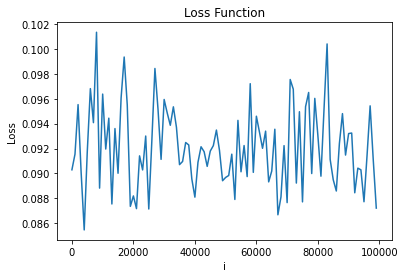

In [326]:
plt.figure()
plt.plot(I,LOSS)
plt.title("Loss Function")
plt.xlabel("i")
plt.ylabel("Loss")
plt.show()  

Text(0.5, 0, 'error_ratio')

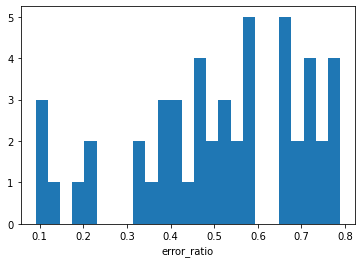

In [327]:
import matplotlib.pyplot as plt

hist_error = []
for a in range (50):
  if(data_JPN[a+600+7,cha] != 0):
    error_ratio = abs(forward(a+600,data_JPN) - data_JPN[a+600+7,cha])/data_JPN[a+600+7,cha]
    hist_error.append(error_ratio)

# ヒストグラムを表示
plt.hist(hist_error, bins=25)
plt.xlabel("error_ratio")